In [11]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
# Dataset Path (Change to your actual dataset location)
dataset_path = "/kaggle/input/new-plant-data-1/Plant leaves dataset"

# Load dataset
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)  # Resize images to match ResNet50 input size

dataset = image_dataset_from_directory(
    dataset_path,
    seed=123,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Get class names and print class distribution
class_names = dataset.class_names
print(f"Classes Found: {class_names}")

Found 1805 files belonging to 20 classes.
Classes Found: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___healthy']


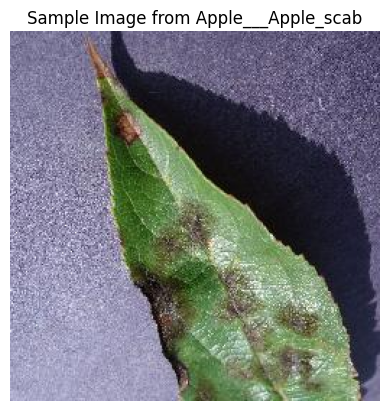

Sample Image Shape: (256, 256, 3) (H, W, C)


In [13]:
# Sample Image Check
for sample_class in class_names:
    sample_image_path = os.path.join(dataset_path, sample_class, os.listdir(os.path.join(dataset_path, sample_class))[0])
    sample_image = cv2.imread(sample_image_path)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    plt.imshow(sample_image)
    plt.title(f"Sample Image from {sample_class}")
    plt.axis("off")
    plt.show()
    print(f"Sample Image Shape: {sample_image.shape} (H, W, C)")
    break  # Just show one sample

# Load pre-trained ResNet50 (without top layer) for feature extraction
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Trying to read: /kaggle/input/new-plant-data-1/Plant leaves dataset/Apple___Apple_scab/image (93).JPG


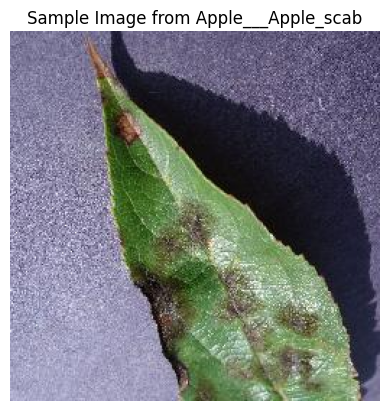

Sample Image Shape: (256, 256, 3) (H, W, C)


In [14]:
import os
import cv2
import matplotlib.pyplot as plt

# Sample Image Check
for sample_class in class_names:
    class_dir = os.path.join(dataset_path, sample_class)
    image_files = os.listdir(class_dir)

    if not image_files:
        print(f"No images found in {class_dir}")
        continue

    sample_image_path = os.path.join(class_dir, image_files[0])
    print(f"Trying to read: {sample_image_path}")  # Debug print

    sample_image = cv2.imread(sample_image_path)

    if sample_image is None:
        print(f"Failed to load image: {sample_image_path}")
        continue

    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    plt.imshow(sample_image)
    plt.title(f"Sample Image from {sample_class}")
    plt.axis("off")
    plt.show()
    print(f"Sample Image Shape: {sample_image.shape} (H, W, C)")
    break  # Just show one sample


In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Optional: Freeze layers if you don't want to train this model
base_model.trainable = False


In [16]:
# Function to extract features from the dataset
def extract_features(dataset):
    feature_list = []
    label_list = []
    for images, labels in dataset:
        features = base_model.predict(images)  # Extract features using ResNet50
        features = features.reshape(features.shape[0], -1)  # Flatten the features
        feature_list.append(features)
        label_list.append(labels.numpy())

    X = np.concatenate(feature_list, axis=0)  # Combine all feature batches
    y = np.concatenate(label_list, axis=0)  # Combine all label batches
    return X, y

In [17]:
# Extract features
X, y = extract_features(dataset)
print(f"Feature shape: {X.shape}, Labels shape: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━

In [18]:
import pandas as pd
feature_df = pd.DataFrame(X)
describe_stats = feature_df.describe().T[['min', 'max', 'mean', 'std']]
print(describe_stats.head())

        min       max      mean       std
0  0.070753  8.812483  3.381674  1.313180
1  0.000000  6.218588  0.493559  0.824300
2  0.000000  4.227497  0.902631  0.780110
3  0.000000  2.007649  0.035425  0.090332
4  0.000000  2.556202  0.119699  0.254412


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


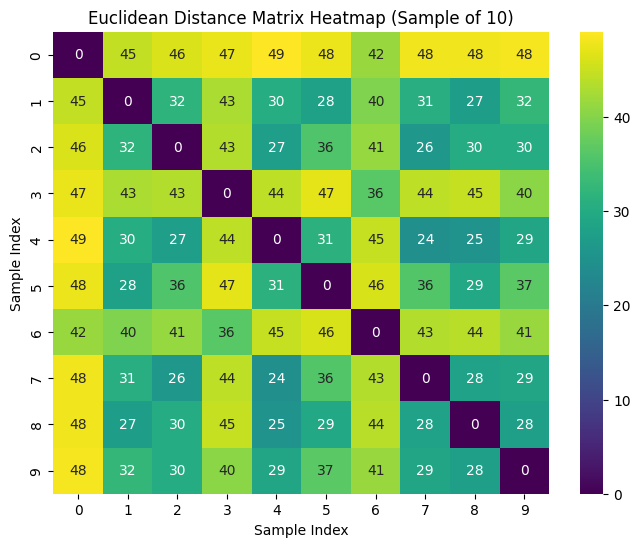

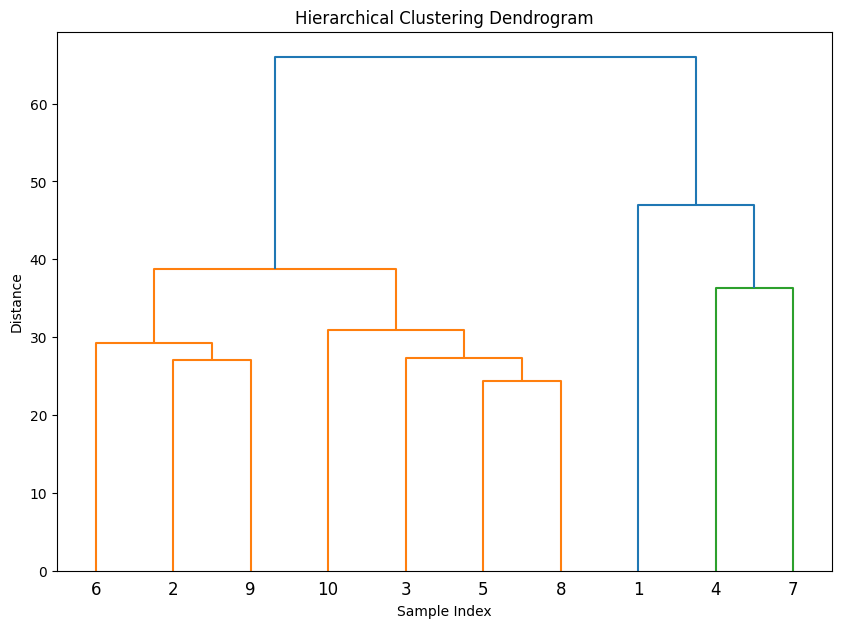

In [24]:
# For visualization, use a small subset (e.g., 10 samples) to avoid huge heatmaps
sample_features = X_train[:10]

# Compute pairwise Euclidean distances
distance_matrix = squareform(pdist(sample_features, metric='euclidean'))

# Plot distance matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, cmap='viridis', annot=True)
plt.title('Euclidean Distance Matrix Heatmap (Sample of 10)')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()

# Dendrogram for clustering based on distances
linked = linkage(sample_features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           labels=range(1, 11),
           distance_sort='ascending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [25]:
import pandas as pd
df = pd.DataFrame(X[:500])
df.iloc[:, :10].corr()


,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.027012,-0.150847,0.113496,-0.098066,-0.096539,-0.154067,-0.102332,0.153726,-0.079787
1,-0.027012,1.000000,-0.255524,0.231554,0.253371,0.080336,0.186019,0.425491,-0.067882,-0.143120
2,-0.150847,-0.255524,1.000000,-0.036983,-0.177651,0.067462,-0.267799,-0.124442,-0.034029,0.027698
3,0.113496,0.231554,-0.036983,1.000000,0.038396,0.020133,-0.010105,0.161052,0.028108,-0.037599
4,-0.098066,0.253371,-0.177651,0.038396,1.000000,0.220309,0.106699,0.134738,-0.000042,0.068737
5,-0.096539,0.080336,0.067462,0.020133,0.220309,1.000000,0.112212,0.259515,-0.043578,-0.056552
6,-0.154067,0.186019,-0.267799,-0.010105,0.106699,0.112212,1.000000,0.245623,-0.082628,-0.010933
7,-0.102332,0.425491,-0.124442,0.161052,0.134738,0.259515,0.245623,1.000000,-0.035628,-0.067117
8,0.153726,-0.067882,-0.034029,0.028108,-0.000042,-0.043578,-0.082628,-0.035628,1.000000,0.036615
9,-0.079787,-0.143120,0.027698,-0.037599,0.068737,-0.056552,-0.010933,-0.067117,0.036615,1.000000


In [27]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(X[:10])
print(type(X), X.shape)


<class 'numpy.ndarray'> (1805, 2048)


In [28]:
from sklearn.metrics.pairwise import euclidean_distances
sample_X = X[:10]
dist_matrix = euclidean_distances(sample_X)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# Print the results
print(f"Random Forest Accuracy:  {accuracy_rf * 100:.2f}%")
print(f"Random Forest Precision: {precision_rf:.3f}")
print(f"Random Forest Recall:    {recall_rf:.3f}")
print(f"Random Forest F1 Score:  {f1_rf:.3f}")


Random Forest Accuracy:  89.75%
Random Forest Precision: 0.910
Random Forest Recall:    0.907
Random Forest F1 Score:  0.904


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model 3: k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# Print the results
print(f"k-NN Accuracy:   {accuracy_knn * 100:.2f}%")
print(f"k-NN Precision:  {precision_knn:.3f}")
print(f"k-NN Recall:     {recall_knn:.3f}")
print(f"k-NN F1 Score:   {f1_knn:.3f}")

k-NN Accuracy:   89.20%
k-NN Precision:  0.896
k-NN Recall:     0.895
k-NN F1 Score:   0.890


In [31]:
from sklearn.linear_model import LogisticRegression

# Model 4: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

# Print the results
print(f"Logistic Regression Accuracy:   {accuracy_lr * 100:.2f}%")
print(f"Logistic Regression Precision:  {precision_lr:.3f}")
print(f"Logistic Regression Recall:     {recall_lr:.3f}")
print(f"Logistic Regression F1 Score:   {f1_lr:.3f}")

Logistic Regression Accuracy:   93.91%
Logistic Regression Precision:  0.946
Logistic Regression Recall:     0.941
Logistic Regression F1 Score:   0.940


In [32]:
# Load and preprocess new image
img = tf.keras.preprocessing.image.load_img('/kaggle/input/new-plant-data-1/Plant leaves dataset/Apple___Black_rot/image (1).JPG', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Extract features using ResNet50
features = base_model.predict(img_array)

# Predict using Logistic Regression model
prediction = lr_model.predict(features)
print("Predicted Disease:", class_names[prediction[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Disease: Apple___Black_rot


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


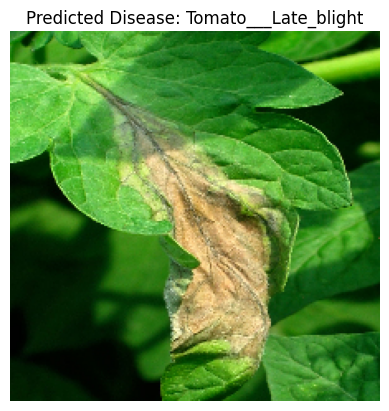

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess new image
img_path = '/kaggle/input/tomatoimg/late_blight_tomato_leaf5x1200.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# Extract features using ResNet50
features = base_model.predict(img_array)

# Predict using Logistic Regression model
prediction = lr_model.predict(features)
predicted_label = class_names[prediction[0]]

# Display image with prediction
plt.imshow(img)
plt.title(f"Predicted Disease: {predicted_label}")
plt.axis('off')
plt.show()


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model 2: SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

# Print the results
print(f"SVM Accuracy:   {accuracy_svm * 100:.2f}%")
print(f"SVM Precision:  {precision_svm:.3f}")
print(f"SVM Recall:     {recall_svm:.3f}")
print(f"SVM F1 Score:   {f1_svm:.3f}")


SVM Accuracy:   92.80%
SVM Precision:  0.937
SVM Recall:     0.930
SVM F1 Score:   0.928


In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess image
img_path = '/kaggle/input/tomatoimg/late_blight_tomato_leaf5x1200.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# Extract features using pre-trained ResNet50
features = base_model.predict(img_array)  # base_model is ResNet50 without top layers


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


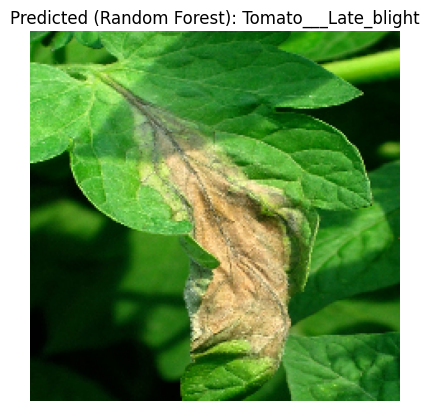

In [44]:
prediction_rf = rf_model.predict(features)
predicted_label_rf = class_names[prediction_rf[0]]

plt.imshow(img)
plt.title(f"Predicted (Random Forest): {predicted_label_rf}")
plt.axis('off')
plt.show()


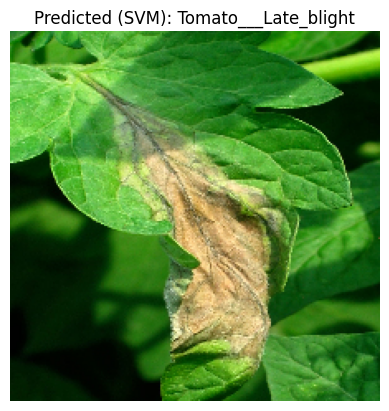

In [45]:
prediction_svm = svm_model.predict(features)
predicted_label_svm = class_names[prediction_svm[0]]

plt.imshow(img)
plt.title(f"Predicted (SVM): {predicted_label_svm}")
plt.axis('off')
plt.show()


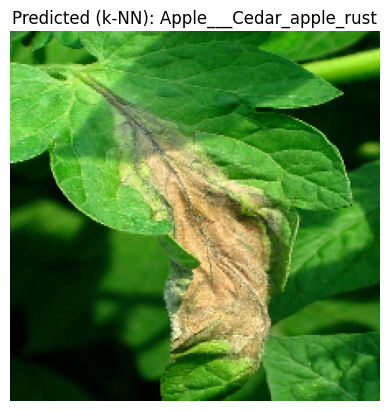

In [46]:
prediction_knn = knn_model.predict(features)
predicted_label_knn = class_names[prediction_knn[0]]

plt.imshow(img)
plt.title(f"Predicted (k-NN): {predicted_label_knn}")
plt.axis('off')
plt.show()


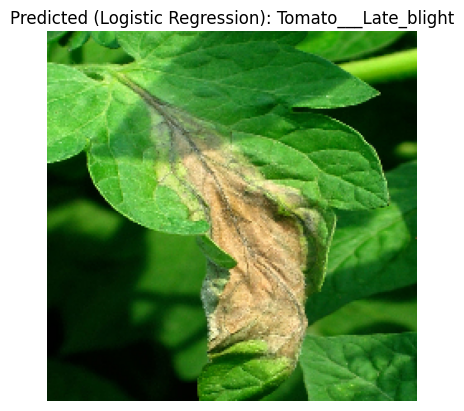

In [47]:
prediction_lr = lr_model.predict(features)
predicted_label_lr = class_names[prediction_lr[0]]

plt.imshow(img)
plt.title(f"Predicted (Logistic Regression): {predicted_label_lr}")
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


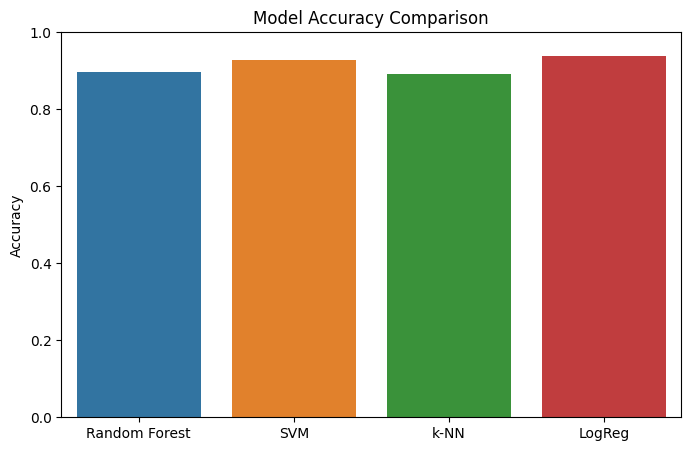

In [39]:
models = ['Random Forest', 'SVM', 'k-NN', 'LogReg']
accuracies = [accuracy_rf, accuracy_svm, accuracy_knn, accuracy_lr]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


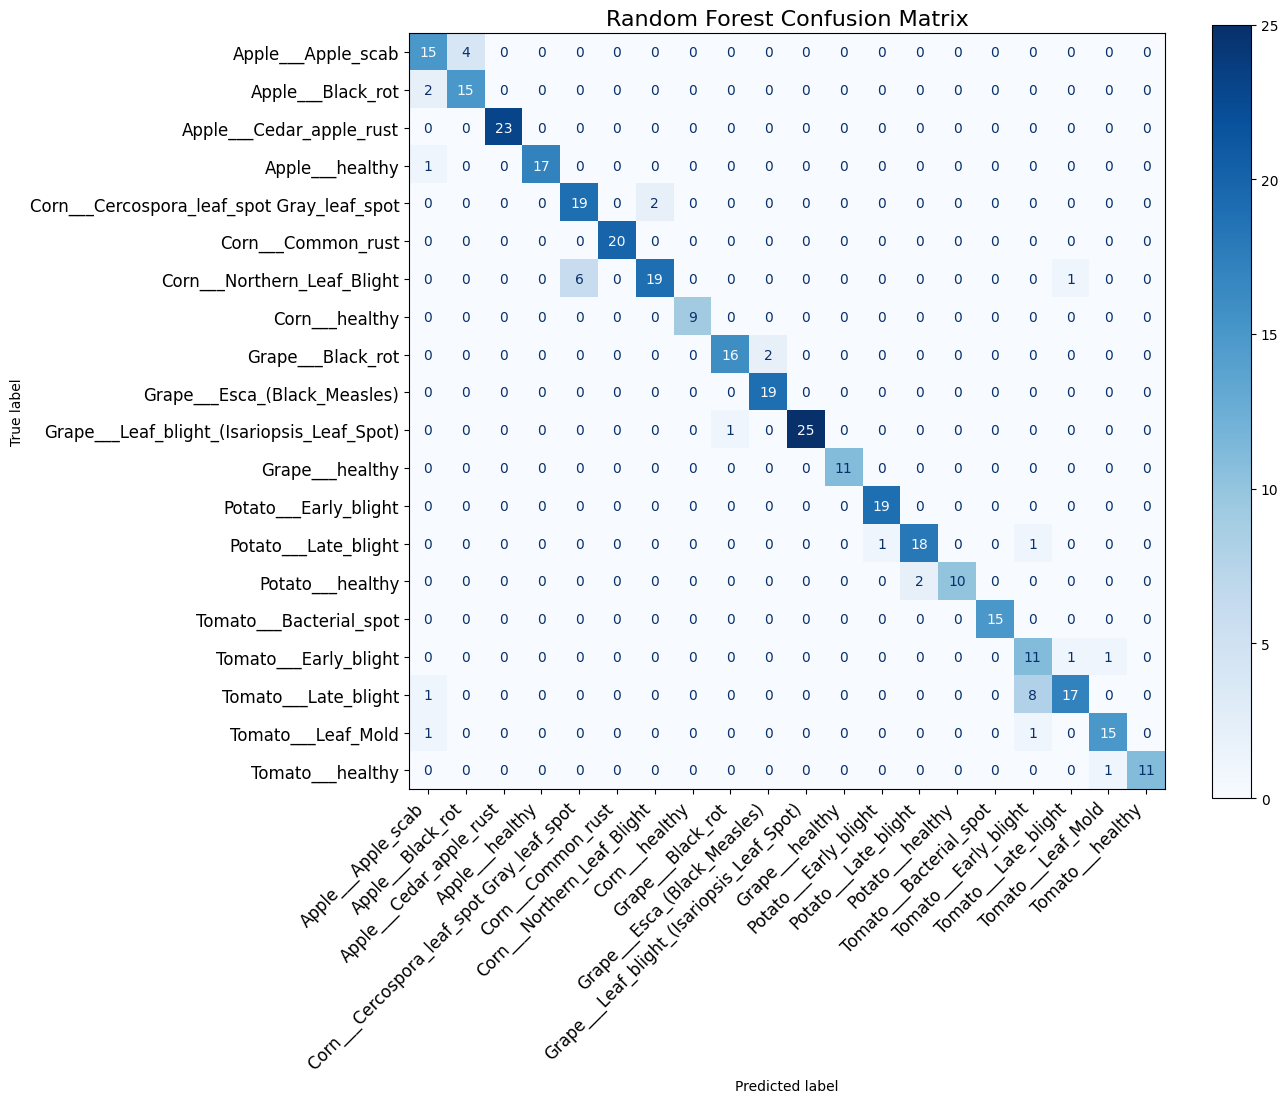

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Increase the figure size
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust figure size

# Confusion matrix with clearer labels and better layout
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=class_names, cmap="Blues", ax=ax)

# Customize tick label rotation and font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-tick labels and increase font size
plt.yticks(fontsize=12)  # Increase y-tick font size

# Adjust layout to prevent clipping
plt.title("Random Forest Confusion Matrix", fontsize=16)
plt.tight_layout()

# Use subplots_adjust to manually adjust space around the plot
plt.subplots_adjust(bottom=0.2, left=0.2)

# Display the plot
plt.show()


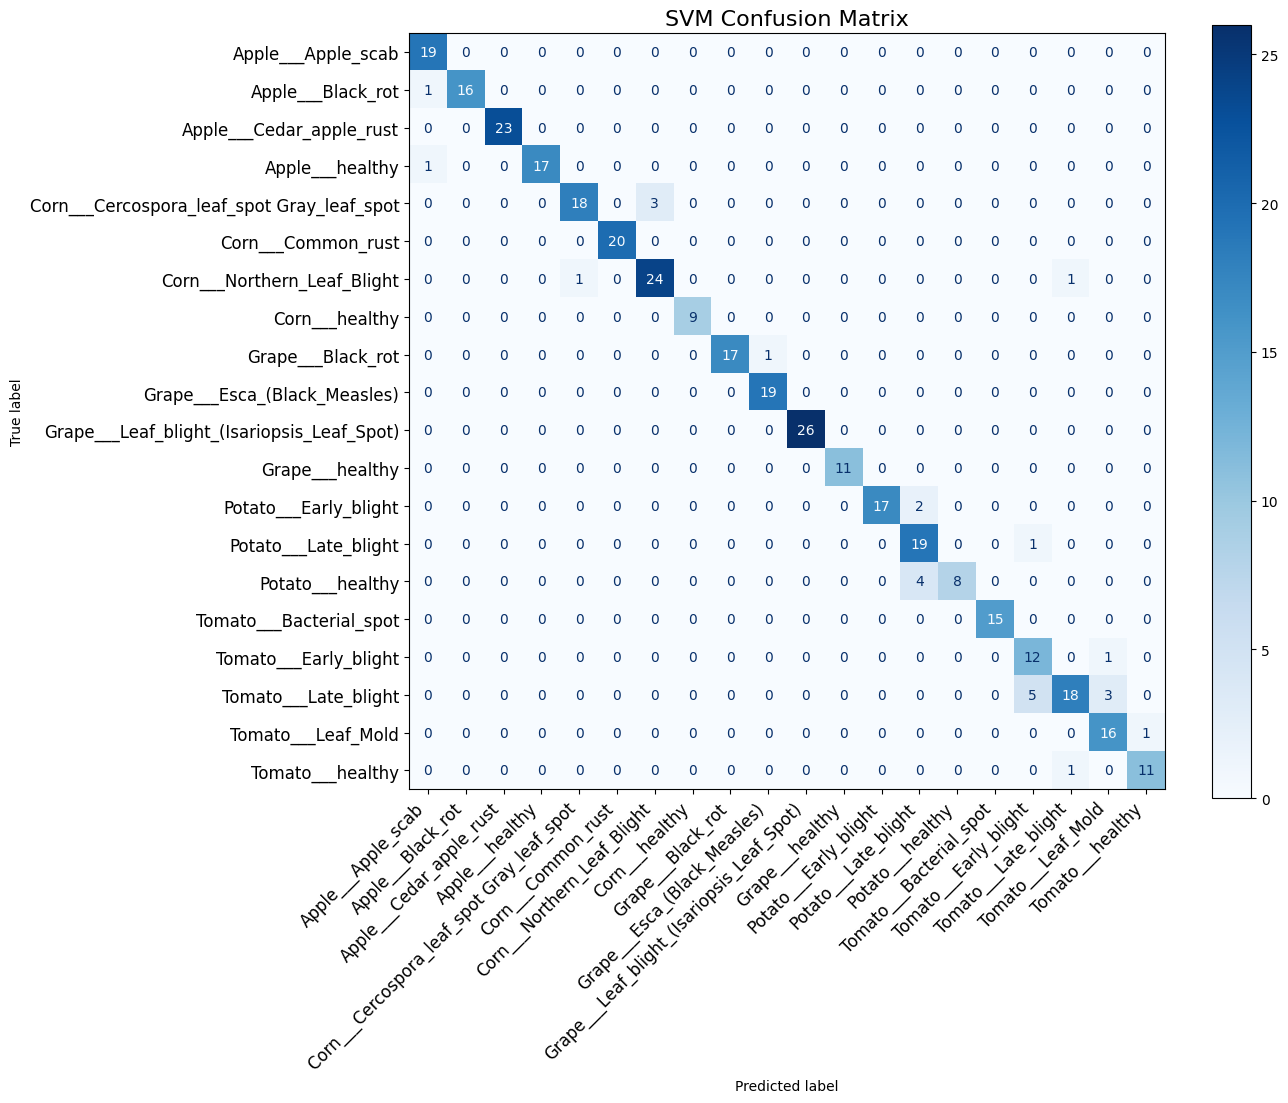

In [41]:
fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, display_labels=class_names, cmap="Blues", ax=ax)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("SVM Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, left=0.2)
plt.show()


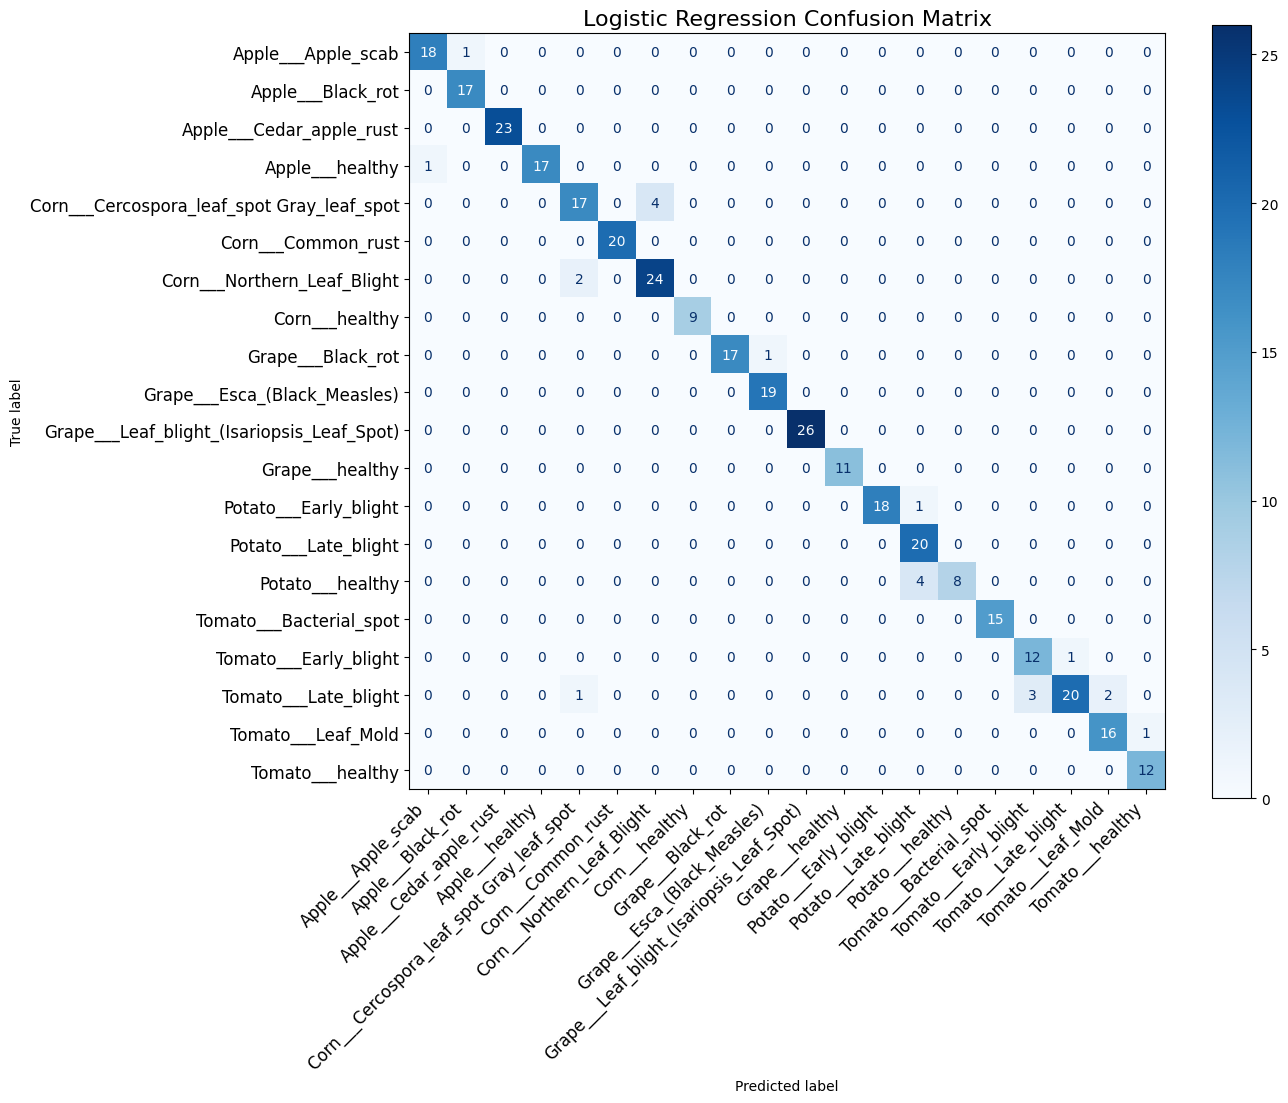

In [42]:
fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, display_labels=class_names, cmap="Blues", ax=ax)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Logistic Regression Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, left=0.2)
plt.show()


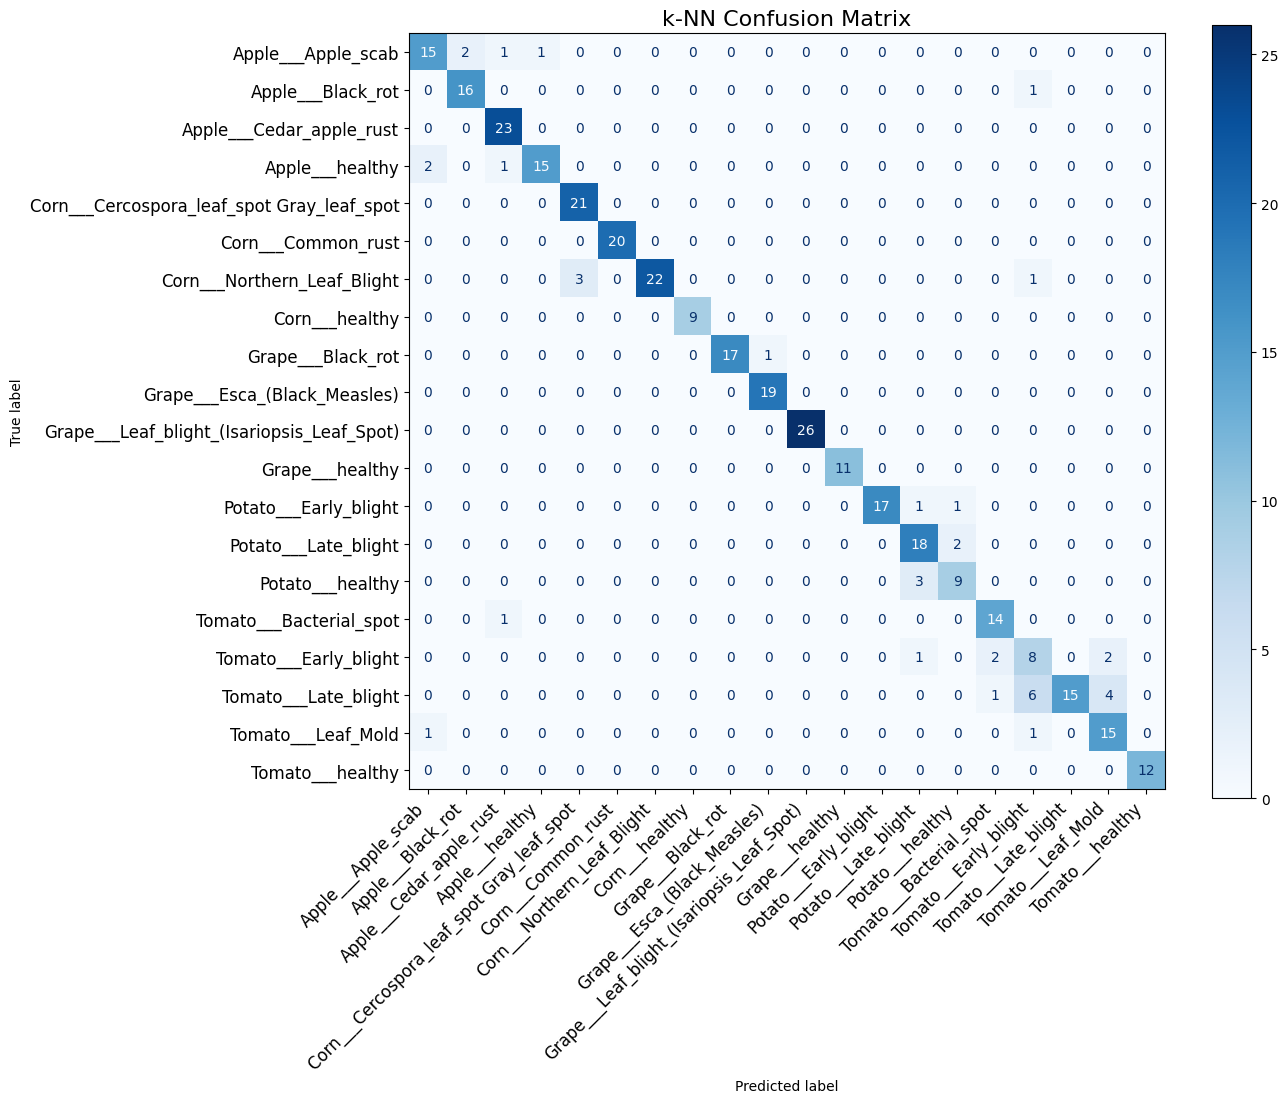

In [43]:
fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, display_labels=class_names, cmap="Blues", ax=ax)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("k-NN Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, left=0.2)
plt.show()
